<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Regression Models with Keras</font></h1>

## Introduction

As we discussed in the videos, despite the popularity of more powerful libraries such as PyToch and TensorFlow, they are not easy to use and have a steep learning curve. So, for people who are just starting to learn deep learning, there is no better library to use other than the keras library. 

Keras is a high-level API for building deep learning models. It has gained favor for its ease of use and syntactic simplicity facilitating fast development. As you will see in this lab and the other labs in this course, building a very complex deep learning network can be achieved with Keras with only few lines of code. You will appreciate Keras even more, once you learn how to build deep models using PyTorch and TensorFlow in the other courses.

So, in this lab, you will learn how to use the Keras library to build a regression model.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3> 
1. <a href="#item1">Download and Clean Dataset</a>  <br></br>
2. <a href="#item2">Import Keras</a>  <br></br>
3. <a href="#item3">Build a Neural Network</a>  <br></br>
4. <a href="#item4">Train and Test the Network</a>  <br></br>
</font>
</div>

## Download and Clean Dataset

Let's start by importing the <em>pandas</em> and the Numpy libraries.

In [1]:
import pandas as pd
import numpy as np

We will be playing around with the same dataset that we used in the videos.

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different materials that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>

Let's download the data and read it into a <em>pandas</em> dataframe.

In [2]:
# concrete_data = pd.read_csv('https://ibm.box.com/shared/static/svl8tu7cmod6tizo6rk0ke4sbuhtpdfx.csv')
# concrete_data.head()

### Download data locally

Notes:

Resource: https://ec.haxx.se/usingcurl/usingcurl-downloads#:~:text=Give%20curl%20a%20specific%20file,full%20path%20to%20the%20file.

    curl http://example.com -o ../../folder/savethis.html

Resource: https://askubuntu.com/questions/1036484/curl-o-stores-an-empty-file-though-wget-works-well

"You've missed to follow redirections with curl as the URL endpoint is redirected (301) to another endpoint (https://s3.amazonaws.com/logzio-elk/apache-daily-access.log); sending a request with HEAD method (-I) to the specified URL:

    curl -LI https://logz.io/sample-data
    
As curl does not follow HTTP redirections by default, you need to tell curl to do so using the -L/--location option:

    curl -LO https://logz.io/sample-data

# `curl -L $URL_DATA -o $TARGET_FILEPATH `

    %%bash

    URL_DATA="https://ibm.box.com/shared/static/svl8tu7cmod6tizo6rk0ke4sbuhtpdfx.csv"

    TARGET_FILEPATH="../data/concrete_data.csv"

    echo "Downloading data from" $URL_DATA "..."

    curl -L $URL_DATA -o $TARGET_FILEPATH 

    echo ""
    echo "Data saved to :" $TARGET_FILEPATH
    echo "Disk space used :" $(! du $TARGET_FILEPATH)

In [3]:
# concrete_data = pd.read_csv('https://ibm.box.com/shared/static/svl8tu7cmod6tizo6rk0ke4sbuhtpdfx.csv')

filepath_concrete_data = "../data/concrete_data.csv"
concrete_data = pd.read_csv(filepath_concrete_data)

In [4]:
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa. 

#### Let's check how many data points we have.

In [5]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.

Let's check the dataset for any missing values.

In [6]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.

#### Split data into predictors and target

In [8]:
# concrete_data_columns = concrete_data.columns

# predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
# target = concrete_data['Strength'] # Strength column

In [9]:
col_target = "Strength"

predictors = concrete_data.drop(col_target, axis=1)
target = concrete_data[col_target]

Let's do a quick sanity check of the predictors and the target dataframes.

In [10]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [11]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.

In [12]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [13]:
n_cols = predictors_norm.shape[1] # number of predictors

<a id="item1"></a>

## Import Keras

Recall from the videos that Keras normally runs on top of a low-level library such as TensorFlow. This means that to be able to use the Keras library, you will have to install TensorFlow first and when you import the Keras library, it will be explicitly displayed what backend was used to install the Keras library. In CC Labs, we used TensorFlow as the backend to install Keras, so it should clearly print that when we import Keras.

#### Let's go ahead and import the Keras library

In [14]:
import keras

As you can see, the TensorFlow backend was used to install the Keras library.

Let's import the rest of the packages from the Keras library that we will need to build our regressoin model.

In [15]:
from keras.models import Sequential
from keras.layers import Dense

## Build a Neural Network

Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.

In [16]:
def regression_model():
    # Create model
    model = Sequential()
    model.add(Dense(50, activation = "relu", input_shape = (n_cols,)))
    model.add(Dense(50, activation = "relu"))
    model.add(Dense(1))
    
    # Compile model
    model.compile(optimizer = "adam", loss = "mean_squared_error")
    
    return model

<a id="item4"></a>

## Train and Test the Network

In [17]:
# Build the model
model = regression_model()

In [18]:
# Fit the model
history = model.fit(
    predictors_norm,
    target,
    validation_split = 0.3,
    epochs = 100,
    verbose = 0, #verbose = 2,
)

In [19]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [20]:
df_history = pd.DataFrame(data={
    "loss" : history.history["loss"],
    "val_loss" : history.history["val_loss"],
})

<AxesSubplot:>

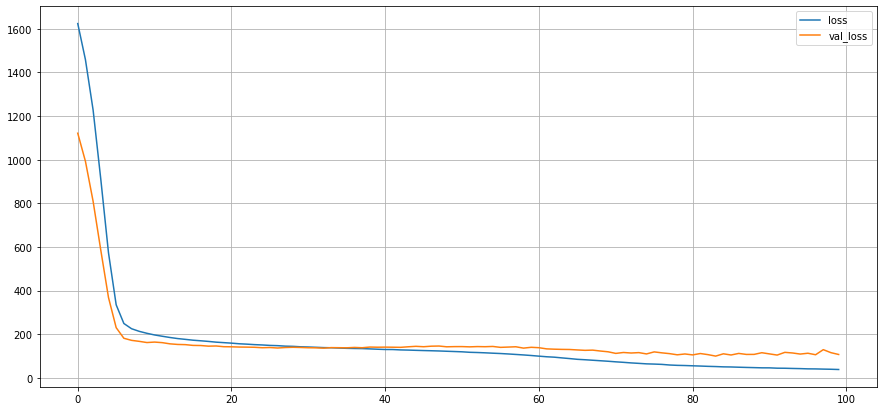

In [21]:
df_history.plot(figsize = (15,7), grid=True)

<strong>You can refer to this [link](https://keras.io/models/sequential/) to learn about other functions that you can use for prediction or evaluation.</strong>

Feel free to vary the following and note what impact each change has on the model's performance:

1. Increase or decrease number of neurons in hidden layers
2. Add more hidden layers
3. Increase number of epochs

### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!

This notebook is part of a course on **edX** called *Deep Learning Fundamentals with Keras*. If you accessed this notebook outside the course, you can take this course online by clicking [here](http://cocl.us/DL0101EN_edX_Week3_LAB1).

<hr>

Copyright &copy; 2018 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).